In [ ]:
! nvidia-smi

Fri Feb  5 06:03:21 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    25W / 300W |      0MiB / 16130MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Setup YOLO

In [2]:
! git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 14691, done.
remote: Total 14691 (delta 0), reused 0 (delta 0), pack-reused 14691
Receiving objects: 100% (14691/14691), 13.27 MiB | 11.24 MiB/s, done.
Resolving deltas: 100% (9995/9995), done.


In [5]:
! head darknet/Makefile

GPU=0
CUDNN=0
CUDNN_HALF=0
OPENCV=0
AVX=0
OPENMP=0
LIBSO=0
ZED_CAMERA=0
ZED_CAMERA_v2_8=0



In [6]:
! sed -i "1s/GPU=0/GPU=1/" darknet/Makefile
! sed -i "2s/CUDNN=0/CUDNN=1/" darknet/Makefile
! sed -i "4s/OPENCV=0/OPENCV=1/" darknet/Makefile

In [ ]:
! cd darknet; make

## 下載權重

In [ ]:
! wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights

## 圖片推理

In [11]:
! ! cd darknet;  ./darknet detect /content/darknet/cfg/yolov4.cfg /content/yolov4.weights /content/darknet/data/person.jpg -dont_show 

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 700, cudnn_half = 0, GPU: Tesla V100-SXM2-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 

In [12]:
! wget https://s.yimg.com/ny/api/res/1.2/dLRhOwj8oClkFjObp_vxVw--/YXBwaWQ9aGlnaGxhbmRlcjt3PTk2MDtoPTUwNS43MzQyNjU3MzQyNjU3Ng--/https://s.yimg.com/uu/api/res/1.2/8cPmeGPOiRNjB67enAr26w--~B/aD00NTI7dz04NTg7YXBwaWQ9eXRhY2h5b24-/https://media.zenfs.com/zh-tw/ctwant_com_582/ab1f867254e586321b6041b2325a0f31

--2021-02-05 06:21:07--  https://s.yimg.com/ny/api/res/1.2/dLRhOwj8oClkFjObp_vxVw--/YXBwaWQ9aGlnaGxhbmRlcjt3PTk2MDtoPTUwNS43MzQyNjU3MzQyNjU3Ng--/https://s.yimg.com/uu/api/res/1.2/8cPmeGPOiRNjB67enAr26w--~B/aD00NTI7dz04NTg7YXBwaWQ9eXRhY2h5b24-/https://media.zenfs.com/zh-tw/ctwant_com_582/ab1f867254e586321b6041b2325a0f31
Resolving s.yimg.com (s.yimg.com)... 87.248.116.11, 87.248.116.12, 2a00:1288:84:800::1002, ...
Connecting to s.yimg.com (s.yimg.com)|87.248.116.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47245 (46K) [image/jpeg]
Saving to: ‘ab1f867254e586321b6041b2325a0f31’

ab1f867254e586321b6 100%[===================>]  46.14K  --.-KB/s    in 0.008s  

2021-02-05 06:21:07 (5.90 MB/s) - ‘ab1f867254e586321b6041b2325a0f31’ saved [47245/47245]



In [13]:
! ! cd darknet;  ./darknet detect /content/darknet/cfg/yolov4.cfg /content/yolov4.weights /content/ab1f867254e586321b6041b2325a0f31.jpg -dont_show 

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 700, cudnn_half = 0, GPU: Tesla V100-SXM2-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 

In [14]:
! head /content/darknet/data/coco.names

person
bicycle
car
motorbike
aeroplane
bus
train
truck
boat
traffic light


## 訓練 YOLO

### 資料準備

In [15]:
! gdown https://drive.google.com/uc?id=1XEvQZbPAi_02DxdSNmnwKPyLFfpYuoCG

Downloading...
From: https://drive.google.com/uc?id=1XEvQZbPAi_02DxdSNmnwKPyLFfpYuoCG
To: /content/layout_dataset.zip
501MB [00:02, 233MB/s]


In [16]:
! unzip layout_dataset.zip > t1.log

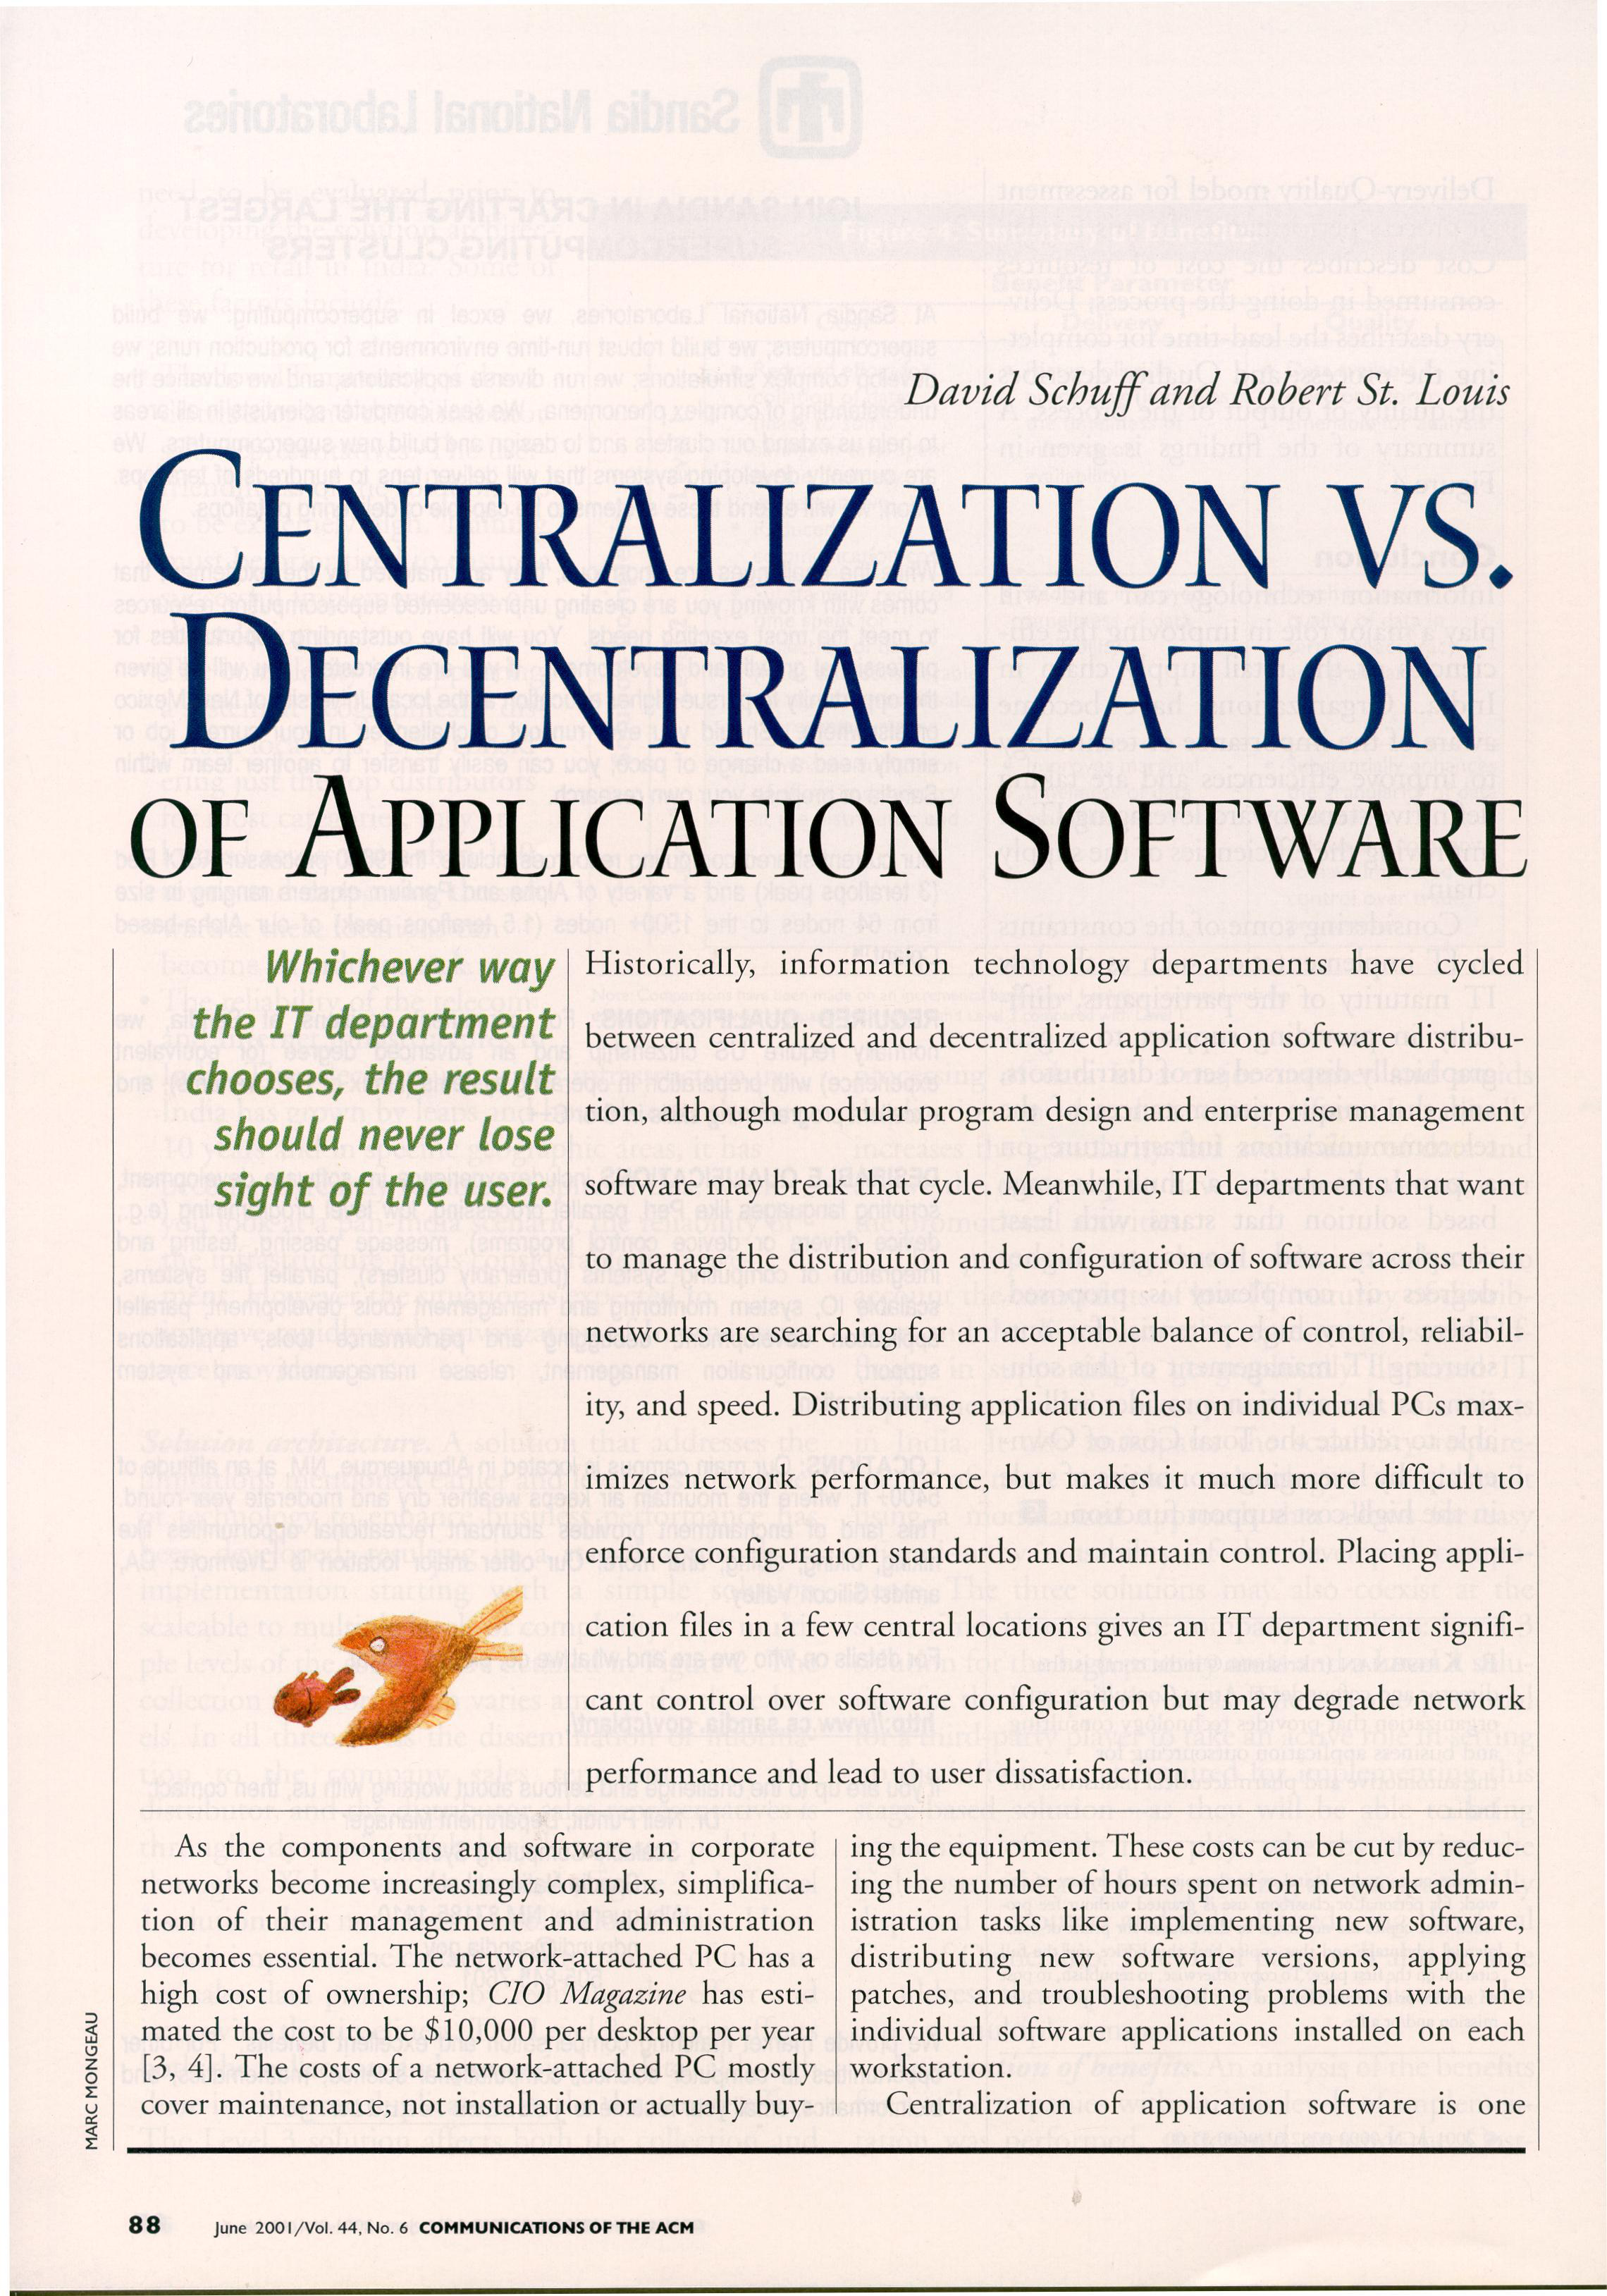

In [18]:
from PIL import Image
Image.open('layout_dataset/Images/00000085.jpg')

In [29]:
! head -n 30  layout_dataset/XML/pc-00000085.xml

<?xml version="1.0" encoding="UTF-8"?>
<PcGts xmlns="http://schema.primaresearch.org/PAGE/gts/pagecontent/2010-03-19" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://schema.primaresearch.org/PAGE/gts/pagecontent/2010-03-19 http://schema.primaresearch.org/PAGE/gts/pagecontent/2010-03-19/pagecontent.xsd" pcGtsId="pc-00000085">
	<Metadata>
	<Creator>PRImA Research</Creator>
	<Created>2009-11-06T15:57:06</Created>
	<LastChange>2010-04-23T15:17:54</LastChange></Metadata>
	<Page imageFilename="00000085.tif" imageWidth="2280" imageHeight="3257">
	<TextRegion id="r0" orientation="0.00000" readingOrientation="0.00000" readingDirection="left-to-right" type="heading" textColour="black" reverseVideo="false" indented="false" primaryLanguage="English" primaryScript="Latin" bgColour="white">
	<Coords>
	<Point x="2141" y="525"/>
	<Point x="2141" y="591"/>
	<Point x="1283" y="591"/>
	<Point x="1283" y="525"/></Coords></TextRegion>
	<SeparatorRegion id="r3" orientation="

In [22]:
! cat layout_dataset/yolo/00000085.txt

3 0.35350877192982455 0.5961007061713233 0.0008771929824561404 0.3662879950875038
3 0.07039473684210526 0.6747006447651213 0.0013157894736842105 0.5228738102548357
3 0.5179824561403509 0.7883021185139699 0.8614035087719298 0.00030703101013202335
3 0.5140350877192983 0.9362910653976052 0.8701754385964913 0.00276327909118821
3 0.956798245614035 0.6745471292600552 0.0013157894736842105 0.5231808412649678
3 0.5201754385964912 0.8603008903899294 0.0008771929824561404 0.11912803193122505
13 0.656578947368421 0.5965612526865214 0.5842105263157895 0.36720908811789993
13 0.29714912280701755 0.8607614369051274 0.41885964912280704 0.1261897451642616
13 0.7390350877192983 0.8510899600859687 0.4201754385964912 0.10684679152594412
11 0.7508771929824561 0.17132330365366902 0.3763157894736842 0.02026404666871354
11 0.5155701754385965 0.2887626650291679 0.868859649122807 0.1869818851704022
9 0.2820175438596491 0.9705250230273258 0.2982456140350877 0.006754682222904513
12 0.08969298245614035 0.968375805

In [31]:
from bs4 import BeautifulSoup
fname = '/content/layout_dataset/XML/pc-00000085.xml'
regions = ['ChartRegion','FrameRegion','GraphicRegion','ImageRegion','LineDrawingRegion','MathsRegion','NoiseRegion','SeparatorRegion','TableRegion','TextRegion']
def getCoords(fname):
  with open(fname, 'r') as f:
      soup = BeautifulSoup(f.read(), 'xml')
      page = soup.select_one('Page')
      dic ={}
      
      ary = []
      for region in regions:
        rs = soup.select(region)
        for r in rs:
          dic = {}
          dic['region'] = region
          dic['region_type'] = r.get('type')
          aryx = []
          aryy = []
          for points in r.select_one('Coords').select('Point'):
            x, y = points.get('x'), points.get('y')
            aryx.append(int(x))
            aryy.append(int(y))
          if aryx and aryy:
            dic['minx'] = min(aryx)
            dic['miny'] = min(aryy)
            dic['maxx'] = max(aryx)
            dic['maxy'] = max(aryy)
            dic['imgname'] = page.get('imageFilename')
            dic['image_w'] = int(page.get('imageWidth'))
            dic['image_h'] = int(page.get('imageHeight'))
            dic['id'] = r.get('id')
            ary.append(dic)
      return ary

getCoords(fname)

[{'id': 'r8',
  'image_h': 3257,
  'image_w': 2280,
  'imgname': '00000085.tif',
  'maxx': 741,
  'maxy': 2477,
  'minx': 388,
  'miny': 2257,
  'region': 'ImageRegion',
  'region_type': None},
 {'id': 'r17',
  'image_h': 3257,
  'image_w': 2280,
  'imgname': '00000085.tif',
  'maxx': 2279,
  'maxy': 3256,
  'minx': 14,
  'miny': 3240,
  'region': 'NoiseRegion',
  'region_type': None},
 {'id': 'r3',
  'image_h': 3257,
  'image_w': 2280,
  'imgname': '00000085.tif',
  'maxx': 807,
  'maxy': 2538,
  'minx': 805,
  'miny': 1345,
  'region': 'SeparatorRegion',
  'region_type': None},
 {'id': 'r12',
  'image_h': 3257,
  'image_w': 2280,
  'imgname': '00000085.tif',
  'maxx': 162,
  'maxy': 3049,
  'minx': 159,
  'miny': 1346,
  'region': 'SeparatorRegion',
  'region_type': None},
 {'id': 'r13',
  'image_h': 3257,
  'image_w': 2280,
  'imgname': '00000085.tif',
  'maxx': 2163,
  'maxy': 2568,
  'minx': 199,
  'miny': 2567,
  'region': 'SeparatorRegion',
  'region_type': None},
 {'id': 'r14',

In [ ]:
#m['x'] = (m['minx'] + (m['maxx']-m['minx'])/2) * 1.0 / m['image_w']
#m['y'] = (m['miny'] + (m['maxy']-m['miny'])/2) * 1.0 / m['image_h']
#m['w'] = (m['maxx']-m['minx']) * 1.0 / m['image_w']
#m['h'] = (m['maxy']-m['miny']) * 1.0 / m['image_h']

In [32]:
! gdown https://drive.google.com/uc?id=1sw2Myz-oUl7QLG3EQSdwmh8UUAcqyOsl

Downloading...
From: https://drive.google.com/uc?id=1sw2Myz-oUl7QLG3EQSdwmh8UUAcqyOsl
To: /content/obj.names
100% 246/246 [00:00<00:00, 384kB/s]


In [34]:
! cat obj.names

ChartRegion
GraphicRegion
ImageRegion
SeparatorRegion
TableRegion
TextRegion_Caption
TextRegion_Credit
TextRegion_Drop-capital
TextRegion_Floating
TextRegion_Footer
TextRegion_Header
TextRegion_Heading
TextRegion_Page-number
TextRegion_Paragraph


In [38]:
! gdown https://drive.google.com/uc?id=1G05BeO-OcXse1XGTIzCEdFVrn-_hXsJD

Downloading...
From: https://drive.google.com/uc?id=1G05BeO-OcXse1XGTIzCEdFVrn-_hXsJD
To: /content/obj.data
100% 173/173 [00:00<00:00, 151kB/s]


In [39]:
! cat obj.data

classes= 14
train  = /content/cfg_mask/train.txt
valid  = /content/cfg_mask/test.txt
names  = /content/cfg_mask/obj.names
backup = /content/drive/MyDrive/aidataset/weights/


In [40]:
! gdown https://drive.google.com/uc?id=17_jW9jBf4kA2NI5uAWCM7CrAKYH5m1MV

Downloading...
From: https://drive.google.com/uc?id=17_jW9jBf4kA2NI5uAWCM7CrAKYH5m1MV
To: /content/yolo-obj.cfg
100% 12.3k/12.3k [00:00<00:00, 8.68MB/s]


## 建立訓練與測試資料集

In [41]:
import os
for f in os.listdir('layout_dataset/yolo'):
  if f.endswith('txtf'):
    os.rename('layout_dataset/yolo/' + f , 'layout_dataset/yolo/' + f.replace('txtf', 'txt') )

In [42]:
! rm -rf /content/cfg_mask
! mkdir /content/cfg_mask

In [43]:
! mv /content/layout_dataset/Images/* /content/layout_dataset/yolo/ 

In [44]:
import os
txt_datasets = [f.strip('.txt') for f in os.listdir('/content/layout_dataset/yolo/') if f.endswith('.txt')]
jpg_datasets = [f.strip('.jpg') for f in os.listdir('/content/layout_dataset/yolo/') if f.endswith('.jpg')]
inter = set(txt_datasets) & set(jpg_datasets)

In [45]:
datasets = ['/content/layout_dataset/yolo/'+ e + '.jpg' for e in inter]

In [46]:
len(datasets)

447

In [47]:
with open('/content/cfg_mask/train.txt', 'w') as f:
    f.write('\n'.join(datasets[0:360]))

In [48]:
with open('/content/cfg_mask/test.txt', 'w') as f:
    f.write('\n'.join(datasets[360:]))

In [50]:
! head /content/cfg_mask/train.txt

/content/layout_dataset/yolo/00001153.jpg
/content/layout_dataset/yolo/00001287.jpg
/content/layout_dataset/yolo/00000232.jpg
/content/layout_dataset/yolo/00001279.jpg
/content/layout_dataset/yolo/00001244.jpg
/content/layout_dataset/yolo/00001209.jpg
/content/layout_dataset/yolo/00001003.jpg
/content/layout_dataset/yolo/00001283.jpg
/content/layout_dataset/yolo/00000992.jpg
/content/layout_dataset/yolo/00001087.jpg


In [51]:
! head /content/cfg_mask/test.txt

/content/layout_dataset/yolo/00000777.jpg
/content/layout_dataset/yolo/00000357.jpg
/content/layout_dataset/yolo/00000742.jpg
/content/layout_dataset/yolo/00000201.jpg
/content/layout_dataset/yolo/00000799.jpg
/content/layout_dataset/yolo/00000815.jpg
/content/layout_dataset/yolo/00001245.jpg
/content/layout_dataset/yolo/00001088.jpg
/content/layout_dataset/yolo/00001002.jpg
/content/layout_dataset/yolo/00000658.jpg
